## Welcome! 


Below is the link to conda guide for dealing with conda virtual environment in comprehensive manner.
https://docs.conda.io/projects/conda/en/4.6.0/_downloads/52a95608c49671267e40c689e0bc00ca/conda-cheatsheet.pdf


*** If you are dealing with data then you might be found of Anaconda software. It is awesome as it provides flexible environment to make your job easy and fast. Let’s say, you have already multiple versions of python installed and you want to use python 3.7x for our product. Currently you are using python 3.9x in your project then you will find some difficulties in making virtual environment with python 3.7x, somehow you will manage to install but there might be again a problem with some of the dependencies. So, how to deal with this kind of situation? ***


**The answer is conda, conda provides you very flexible way to install the kind of python 3 version you want. Here at Infertrade we have managed to serve our clients with awesome steps.**

#### Let’s create a virtual environment having python 3.7x with conda with virtual environment name – infertradeconda. You are always free to give the name of your choice.

#### Step1: Open Anaconda prompt and make your way to desire drive (probably C drive)

#### Step2: make a sub folder “infertrade” in user’s folder.

#### Step3: conda create --name infertradeconda python = 3.7

#### Step4: conda env list

#### Step5: activate infertradeconda

#### Step6: python –version

#### make sure you have python 3.7x.

#### Step7: curl https://bootstrap.pypa.io/get-pip.py -o get-pip.py

#### Step8: py get-pip.py

#### Step9: pip install infertrade

#### Step10: pip install jupyter notebook

#### Step11: Open jupyter notebook activated virtual environment by running – jupyter notebook

#### **Congratulation’s! You are all set to work with virtual environment having infertrade.


## Here we have presented very small apporach just to give you guys overview. 

In [4]:
#importing required libraries

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from infertrade.utilities.performance import calculate_portfolio_performance_python

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_csv("LBMA_Gold.csv")

In [4]:
data.shape

(12947, 2)

In [5]:
data.head()

,Date,LBMA/GOLD usd (pm)
0,1970-01-02,35.08
1,1970-01-05,35.17
2,1970-01-06,35.05
3,1970-01-07,35.00
4,1970-01-08,34.95


In [6]:
data.dtypes

Date                   object
LBMA/GOLD usd (pm)    float64
dtype: object

In [7]:
data.isnull().any()

Date                  False
LBMA/GOLD usd (pm)     True
dtype: bool

In [8]:
data['LBMA/GOLD usd (pm)'].describe()

count    12859.000000
mean       581.831403
std        474.075210
min         34.750000
25%        290.850000
50%        385.000000
75%        853.500000
max       2067.150000
Name: LBMA/GOLD usd (pm), dtype: float64

In [10]:
data['LBMA/GOLD usd (pm)'].value_counts().head(10)

383.00    17
384.50    15
35.30     14
383.50    14
384.00    14
369.00    13
383.25    13
392.00    12
35.00     12
375.25    11
Name: LBMA/GOLD usd (pm), dtype: int64

(array([2304., 5876., 1026.,  427.,  371.,  932., 1015.,  449.,  360.,
          99.]),
 array([  34.75,  237.99,  441.23,  644.47,  847.71, 1050.95, 1254.19,
        1457.43, 1660.67, 1863.91, 2067.15]),
 <BarContainer object of 10 artists>)

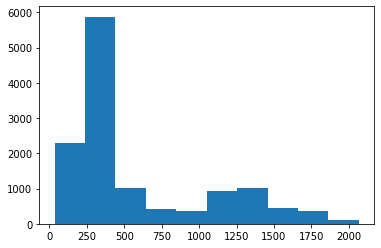

In [11]:
plt.hist(data['LBMA/GOLD usd (pm)'])

<AxesSubplot:xlabel='LBMA/GOLD usd (pm)', ylabel='Density'>

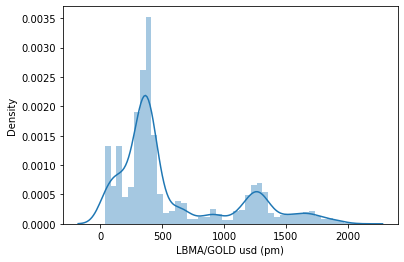

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.distplot(data['LBMA/GOLD usd (pm)'])

In [18]:
data['LBMA/GOLD usd (pm)'] = data['LBMA/GOLD usd (pm)'].fillna(data['LBMA/GOLD usd (pm)'].median())

In [20]:
data['LBMA/GOLD usd (pm)'].isnull().sum()

0

In [21]:
def buy_on_small_rises(df: pd.DataFrame) -> pd.DataFrame:
    """A rules that buys when the market rose between 2% and 10% from previous close."""
    df["allocation"] = 0.0
    df.loc[df["price"].pct_change(50) >= 0.02, "allocation"] = 0.25
    df.loc[df["price"].pct_change(50) >= 0.05, "allocation"] = 0.5
    df.loc[df["price"].pct_change(50) >= 0.10, "allocation"] = 0.0
    return df


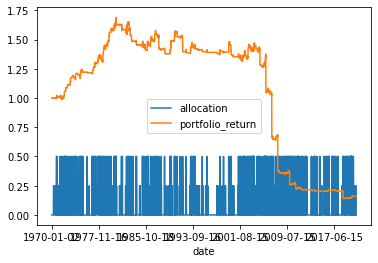

In [35]:
my_dataframe_without_allocations = data.rename(columns={"LBMA/GOLD usd (pm)": "price", "Date": "date"})
my_dataframe_with_allocations = buy_on_small_rises(my_dataframe_without_allocations)
my_dataframe_with_returns = calculate_portfolio_performance_python(my_dataframe_with_allocations)
my_dataframe_with_returns.plot(x="date", y=["allocation", "portfolio_return"])
plt.show()